In [ ]:
from pymongo import MongoClient
import bcrypt

'''connecting with remote client(here atlas), or local host'''

client = MongoClient('enter your link to connect')
db = client['finance_tracker']

#funtion to register user and check if it already exists
#password is saved with encryption using bcrypt

def register_user(username, password):
    users = db['users']
    if users.find_one({'username': username}):
        return "Username already exists."
    hashed_pw = bcrypt.hashpw(password.encode('utf-8'), bcrypt.gensalt())
    users.insert_one({'username': username, 'password': hashed_pw})
    return "User registered successfully."

#funtion to authenticate user, and allow access

def authenticate_user(username, password):
    users = db['users']
    user = users.find_one({'username': username})
    if user and bcrypt.checkpw(password.encode('utf-8'), user['password']):
        return True
    return False


In [ ]:
import datetime

#Funtion to add transcations with parameters

def add_transaction(username, type, category, amount):
    transactions = db['transactions']
    transaction = {
        'username': username,
        'type': type,
        'category': category,
        'amount': amount,
        'date': datetime.datetime.now()
    }
    transactions.insert_one(transaction)
    return "Transaction added successfully."


#Function to view transactions


def view_transactions(username):
    transactions = db['transactions']
    return list(transactions.find({'username': username}))


In [ ]:
#generating summary
#use of data agregation pipeline in MongoDB


def generate_summary(username, period='monthly'):
    transactions = db['transactions']
    pipeline = [
        {'$match': {'username': username}},
        {'$group': {
            '_id': {
                'year': {'$year': '$date'},
                'month': {'$month': '$date'} if period == 'monthly' else None,
                'category': '$category'
            },
            'total': {'$sum': '$amount'}
        }}
    ]
    return list(transactions.aggregate(pipeline))


In [ ]:
#basic visualization

import matplotlib.pyplot as plt

def visualize_summary(username, period='monthly'):
    summary = generate_summary(username, period)

    labels = [f"{item['_id']['category']} ({item['_id']['month']}/{item['_id']['year']})" for item in summary]
    sizes = [item['total'] for item in summary]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()


In [ ]:
#Test case




print(register_user('john_doe', 'password123'))


Username already exists.


In [ ]:
print(register_user('john_doe', 'password123'))

Username already exists.


In [ ]:
print(authenticate_user('john_doe', 'password12'))

False


In [ ]:
print(authenticate_user('john_doe', 'password123'))

True


In [ ]:
add_transaction('john_doe', 'expense', 'food', 50)
add_transaction('john_doe', 'income', 'salary', 1000)

'Transaction added successfully.'

In [ ]:
transactions = view_transactions('john_doe')
print(transactions)

[{'_id': ObjectId('6675d38a0ce644166f93d288'), 'username': 'john_doe', 'type': 'expense', 'category': 'food', 'amount': 50, 'date': datetime.datetime(2024, 6, 21, 19, 24, 58, 66000)}, {'_id': ObjectId('6675d38a0ce644166f93d289'), 'username': 'john_doe', 'type': 'income', 'category': 'salary', 'amount': 1000, 'date': datetime.datetime(2024, 6, 21, 19, 24, 58, 317000)}, {'_id': ObjectId('6675d6a50ce644166f93d28b'), 'username': 'john_doe', 'type': 'expense', 'category': 'food', 'amount': 50, 'date': datetime.datetime(2024, 6, 21, 19, 38, 13, 356000)}, {'_id': ObjectId('6675d6a50ce644166f93d28c'), 'username': 'john_doe', 'type': 'income', 'category': 'salary', 'amount': 1000, 'date': datetime.datetime(2024, 6, 21, 19, 38, 13, 588000)}]


[{'_id': {'year': 2024, 'month': 6, 'category': 'food'}, 'total': 100}, {'_id': {'year': 2024, 'month': 6, 'category': 'salary'}, 'total': 2000}]


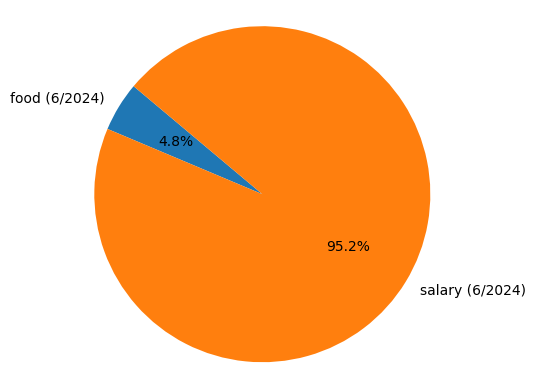

In [ ]:
summary = generate_summary('john_doe')
print(summary)
visualize_summary('john_doe')

In [ ]:
print(register_user('john', 'password123'))


User registered successfully.


In [ ]:
print(register_user('john', 'password123'))


Username already exists.


In [ ]:
print(authenticate_user('john', 'password123'))


True


In [ ]:
print(authenticate_user('john', 'password13'))


False


In [ ]:
add_transaction('john', 'income', 'salary', 10000)

add_transaction('john', 'expense', 'food', 500)
add_transaction('john', 'expense', 'food', 50)
add_transaction('john', 'expense', 'entertainment', 200)
add_transaction('john', 'expense', 'rent', 5000)
add_transaction('john', 'expense', 'medical', 1000)
add_transaction('john', 'expense', 'travel', 200)


'Transaction added successfully.'

[{'_id': {'year': 2024, 'month': 6, 'category': 'entertainment'}, 'total': 200}, {'_id': {'year': 2024, 'month': 6, 'category': 'food'}, 'total': 550}, {'_id': {'year': 2024, 'month': 6, 'category': 'rent'}, 'total': 5000}, {'_id': {'year': 2024, 'month': 6, 'category': 'travel'}, 'total': 200}, {'_id': {'year': 2024, 'month': 6, 'category': 'salary'}, 'total': 10000}, {'_id': {'year': 2024, 'month': 6, 'category': 'medical'}, 'total': 1000}]


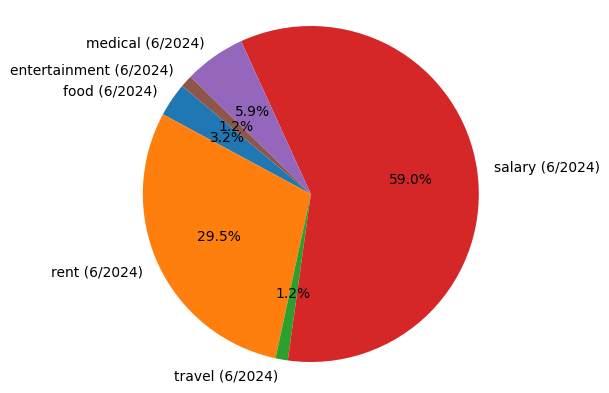

In [ ]:
summary = generate_summary('john')
print(summary)
visualize_summary('john')